## Random Forest Regression

Random forest, ensemble learning üyesidir.

Ensemble Learning: Aynı anda pek çok algoritmayı kullanarak elde edilen bir modeldir. Aynı anda birden fazla machine learning algoirtması kullanıyor ve bunların ortalamasını alarak sonucu elde ediyor.

Random forest, decision tree'lerin toplamından oluşan bir algoritmadır. Belirlediğimiz sayı kadar decision tree toplanıyor ve elde edilen sonuçların ortalaması alınarak Random Forest algoritmasının sonucu elde ediliyor.

Veri seti içerisinden n sayıda sample seçilerek sub data elde ediliyor. sub data'yı tree'lerde eğitiyoruz. Ve elde edilen tüm sonuçların ortalaması alınarak algoritma sonucuna ulaşılıyor.

Günlük hayatta Random Forest algoritması'nın kullanıldığı örnekler:

    🔵 Body part classification
    
    🔵 Stock price prediction
    
    🔵 Tavsiye sistemleri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("random_forest_regression_dataset.csv",sep=";", header=None)
df

,0,1
0,1,100
1,2,80
2,3,70
3,4,60
4,5,50
5,6,40
6,7,30
7,8,20
8,9,10
9,10,5


Veri setinde 0 isimli sütun, tribünde seyircinin maçı izlediği seviyedir. Mesela 1 değeri sahaya en yakın olan seviyedir. 1 isimli sütun ise fiyatı ifade ediyor.

In [3]:
x = df.iloc[:,0].values.reshape(-1,1)
y = df.iloc[:,1].values.reshape(-1,1)

In [4]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100 , random_state=42)

n_estimators=100 parametresi ile kaç adet tree kullanacağımızı belirttim. Burada 100 tane decision tree kullanacağız.

random_state=42 parametresini açıklayalım. veri seti içerisinden n sayıda sample seçerek sub data oluşturuyorduk. Bu n sayıda sample'ı random bir şekilde seçiliyor.

Diyelim ki kodu çalıştırdık ve bir sonuç elde ettik. Sonra bir kez daha çalıştırdık ve bu sefer farklı bir sonuç elde ettik. Farklı sonuçlar elde edilme sebebi, n sayıda sample seçimi yapılırken bu seçim rastgele seçiliyor. Ama random_state parametresi ile bir değer belirleyerek kodu bir sonraki çalıştırmamızda, bir önceki çalıştırmamızda nasıl bölünme gerçekleştirildiyse aynı şekilde bölünmesi sağlanır. Böylece kodu iki kez çalıştırdığımızda iki sonuçta aynı olur. 

Yani random_state parametresi ile aynı random değerlerin seçilmesi sağlanır.

In [5]:
rf.fit(x,y)

print("7.8 seviyesinde fiyat değeri: ",rf.predict([[7.8]]))

7.8 seviyesinde fiyat değeri:  [22.7]


C:\Users\raziy\AppData\Local\Temp/ipykernel_8508/3756995660.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x,y)


In [6]:
x_ = np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head = rf.predict(x_)     #Her bir x değeri için tahmin değerini elde edip y_head değişkenine atadım.

Şimdi de görselleştirme yapalım.

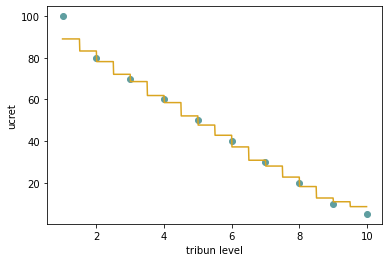

In [9]:
plt.scatter(x,y,color="CadetBlue")
plt.plot(x_,y_head,color="GoldenRod")
plt.xlabel("tribun level")
plt.ylabel("ucret")
plt.show()

Decision tree algoritmasında 1 tane decision tree kullanmıştık. Random Forest algoritmasında ise 100 tane decision tree kullandık. Ve 100 tane decision tree kullanmak, 1 tane decision tree kullanmaktan daha iyi sonuç verir.

Random forest algoritması genelde decision tree algoritmasından daha iyi sonuçlar verir.